# **KNN Challenge (Practice)**

## Assignment:


The dataset is located [here](https://archive.ics.uci.edu/ml/datasets/abalone). Use the abalone dataset to predict sex from its features using KNN. Note that we have used this dataset before, but for a regression task. For regression, the target was number of rings. In this case, the target is sex.



In [ ]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Load data directly from url
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1jfU2oFSfhX1ywUbqETExDJuztO95r3h6pbWAm7xpwNY/gviz/tq?tqx=out:csv&sheet=users')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# check for duplicates
df.duplicated().sum()

0

1. Is this a balanced data set?



In [ ]:
# sex is target variable (y)
df['sex'].value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

This is a pretty balanced dataset. There are three classes ('M', 'I', and 'F'), and they all represent roughly a third of the observations (ranging from ~31% to ~37%).

In [ ]:
# multiclass classification problem: encode target variable
# is ordinal encoding the best option here? will the model treat it as ordinal?
# what's the alternative way to encode for multiclass classification?

df['sex'].replace({'M': 0, 'I': 1, 'F': 2}, inplace = True)

# answer: don't need to make target variable numeric, so can leave as-is

In [ ]:
# assign target variable (y) and feature matrix (X)
target = 'sex'
y = df[target]
X = df.drop(columns = target)

# check
print(f"y:\n{y}")
print()
print(f"X: \n{X}")

y:
0       0
1       0
2       2
3       0
4       1
       ..
4172    2
4173    0
4174    0
4175    2
4176    0
Name: sex, Length: 4177, dtype: int64

X: 
      length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945

In [ ]:
# model validation: train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

2. Be sure to scale your data (try using the pipeline!)



In [ ]:
# do not need column selectors (all columns are numeric)

In [ ]:
# instantiate scaler (KNN requires scaling of numeric features)

scaler = StandardScaler()

In [ ]:
# instantiate default KNN model

knn_default = KNeighborsClassifier()

In [ ]:
# put scaler and model in a pipeline

knn_default_pipe = make_pipeline(scaler, knn_default)
knn_default_pipe

# alternate way (without having to instantiate scaler and model in separate lines of code):
# knn_default_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# fit model on training data only
knn_default_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

3. What is the accuracy of your default model?

In [ ]:
knn_default_test_pred = knn_default_pipe.predict(X_test)
knn_default_accuracy = accuracy_score(y_test, knn_default_test_pred)
knn_default_accuracy

0.5502392344497608

4. What is the optimal accuracy you can achieve by tuning the value of K using KNN?



In [ ]:
# create list of Ks to loop through (1 is fewest possible neighbors; len(df) is
# most possible neighbors)
k_vals = list(range(1, 150))

In [ ]:
# make df to save accuracy scores
knn_scores = pd.DataFrame(index = k_vals, columns = ['Train Accuracy', 
                                                     'Test Accuracy'])

In [ ]:
# check
knn_scores

,Train Accuracy,Test Accuracy
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
145,NaN,NaN
146,NaN,NaN
147,NaN,NaN
148,NaN,NaN


In [ ]:
# use for loop to tune KNN model on n_neighbors

# loop through each k value
for k_val in k_vals:

  # instantiate scaler
  scaler = StandardScaler()

  # make knn model with k_val number of neighbors
  knn = KNeighborsClassifier(n_neighbors = k_val)

  # make pipeline with scaler
  knn_pipe = make_pipeline(scaler, knn) # see above cell for alternate way to code with fewer lines

  # fit model on training data
  knn_pipe.fit(X_train, y_train)

  # make predictions
  knn_train_pred = knn_pipe.predict(X_train) # don't have to include training set data
  knn_test_pred = knn_pipe.predict(X_test)

  # save accuracy scores in df
  knn_scores.loc[k_val, 'Train Accuracy'] = accuracy_score(y_train, knn_train_pred) # don't have to include training set data
  knn_scores.loc[k_val, 'Test Accuracy'] = accuracy_score(y_test, knn_test_pred) # alternate way to code for fewer lines: accuracy_score(y_test, knn_pipe.predict(X_test))

In [ ]:
# to get code to print out optimal n_neighbors and its accuracy score without saving all to a dataframe,
# and to see a plot of accuracy change over loop:

# before loop:
# test_accuracies = []
# best_acc = 0
# best_k = 0

# for k in k_vals:
  # instantiate pipe with scaler and model
  # fit on training data
  # acc = accuracy_score(y_test, pipe.predict(X_test)
  # if accuracy for this k is better than previous accuracies, set best_k to k
  # if acc > best_acc:
    # best_acc = acc
    # best_k = k
  # test_accuracies.append(acc) # for plotting

# plot accuracies over K
# plt.plot(k_vals, test_accuracies, label = 'Test K Scores')
# plt.show()

# print out best_k and best_acc
# print(f"Best K value is {best_k} \nwith {best_acc} accuracy on the test set")

In [ ]:
# look at top 5 highest n_neighbors values on Test Accuracy
knn_scores_sorted = knn_scores.sort_values(by = 'Test Accuracy', ascending = False)
knn_scores_sorted.head()

,Train Accuracy,Test Accuracy
115,0.554598,0.583732
117,0.555236,0.583732
68,0.569604,0.581818
102,0.564815,0.581818
120,0.557791,0.581818


In [ ]:
# grab optimal n_neighbors value from knn_scores
optimal_n_neighbors = knn_scores_sorted.index[0]
optimal_n_neighbors

115

5. Create a confusion matrix for your optimal KNN model.



In [ ]:
# instantiate KNN model optimized for n_neighbors
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n_neighbors)

In [ ]:
# create pipeline with knn_optimal model
knn_optimal_pipe = make_pipeline(StandardScaler(), knn_optimal)

In [ ]:
# fit optimal model
knn_optimal_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=115))])

In [ ]:
# create test predictions for optimal model
knn_optimal_test_pred = knn_optimal_pipe.predict(X_test)

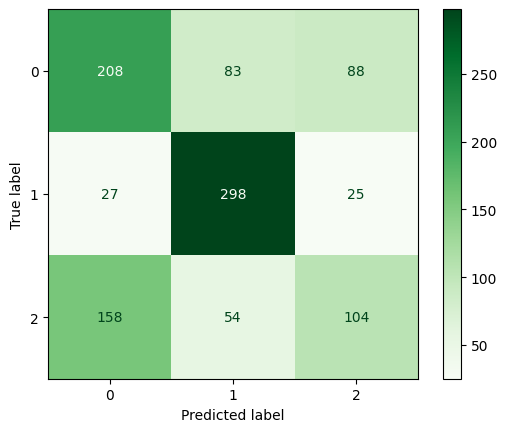

In [ ]:
# plot confusion matrix
labels = ['M', 'I', 'F'] # only need this if encoded target variable strings to numbers in beginning
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        knn_optimal_test_pred, 
                                        # display_labels = labels, # ditto
                                        cmap = 'Greens');

## Solutions

[Assignment Solutions](https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/KNNSolutions.ipynb)